In [11]:
import numpy as np
import os
import glob
import matlab.engine
import matplotlib.pyplot as plt

eng = matlab.engine.start_matlab()
eng.addpath('/home/local/VANDERBILT/kanakap/gradtensor/npy-matlab/')
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_Lest/connectivity_matrices/',p[i]+'/tracto_op_2_Lest/connectivity_matrices/']
    d[i] = a

all_mod = {}
all_gb = {}
all_cpl = {}
for i in d:
    for f in os.listdir(d[i][0]):
        if f.endswith('__sc.npy'):
            tot = d[i][0] + f 
            if os.path.exists(tot):
                mod = eng.compute_mod(tot)
                gb = eng.compute_gb(tot)
        if f.endswith('__len.npy'):
            clen = d[i][0] + f
            if os.path.exists(clen):
                cpl = eng.compute_cpl(clen)
    
    for l in os.listdir(d[i][1]):
        if l.endswith('__sc.npy'):
            tot1 = d[i][1]  + l
            if os.path.exists(tot1):
                mod1 = eng.compute_mod(tot1)
                gb1 = eng.compute_gb(tot1)
        if l.endswith('__len.npy'):
            clen1 = d[i][1] + l
            if os.path.exists(clen1):
                cpl1 = eng.compute_cpl(clen1)

    all_mod[i] = [mod, mod1]
    all_gb[i] = [gb, gb1]
    all_cpl[i] = [cpl, cpl1]
    mod = np.nan
    mod1 = np.nan
    gb = np.nan
    gb1 = np.nan
    cpl = np.nan
    cpl1 = np.nan
eng.quit()


In [6]:
data1mod = []
data2mod = []
ind = []
for i in all_mod:
    if ~np.isnan(all_mod[i][0]) and ~np.isnan(all_mod[i][1]):
        data1mod.append(all_mod[i][0])
        data2mod.append(all_mod[i][1])
        ind.append(i)
import pandas as pd
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')
csv_data['sex'].replace(['male','female'],['b','r'],inplace=True)
csv_data['age'] = np.where(csv_data['age'].between(5,5.9),1,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(6,6.9),2,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(7,7.9),3,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(8,8.9),4,csv_data['age'])
csv_data['age'].replace([1,2,3,4],['o','x','^','+'],inplace=True)
csv_data.iloc[ind]

,Unnamed: 0,participant_id,session_id,sex,age,handedness
0,51,cIVs001,s1Bx2,b,x,right
1,52,cIVs001,s1Bx3,b,^,right
2,53,cIVs002,s1Bx2,r,^,right
3,54,cIVs005,s1Bx2,r,x,right
4,55,cIVs005,s1Bx3,r,^,right
...,...,...,...,...,...,...
113,164,cIVs102,s1Bx1,b,x,right
114,165,cIVs104,s1Bx1,r,x,right
115,166,cIVs108,s1Bx1,b,x,right
116,167,cIVs109,s1Bx1,b,x,right


In [7]:
def bland_altman_plot(data1, data2, labels, sym, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.nanmean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.nanmean(diff)                   # Mean of the difference
    sd        = np.nanstd(diff, axis=0)            # Standard deviation of the difference
    #print(diff)

    for i in range(len(mean)):
         plt.scatter(mean[i], diff[i], c=labels[i], marker=sym[i], s=120, *args, **kwargs)
    
    legend_element = [Line2D([0],[0], lw=4,color='b',label='Male',markersize=8),
                    Line2D([0],[0], lw=4,color='r',label='Female',markersize=8),
                     Line2D([],[], marker='o',color='k',label='Age 5 - 5.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='x',color='k',label='Age 6 - 6.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='^',color='k',label='Age 7 - 7.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='+',color='k',label='Age 8 - 8.9',linestyle='None',markersize=10)]
    plt.legend(handles=legend_element)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

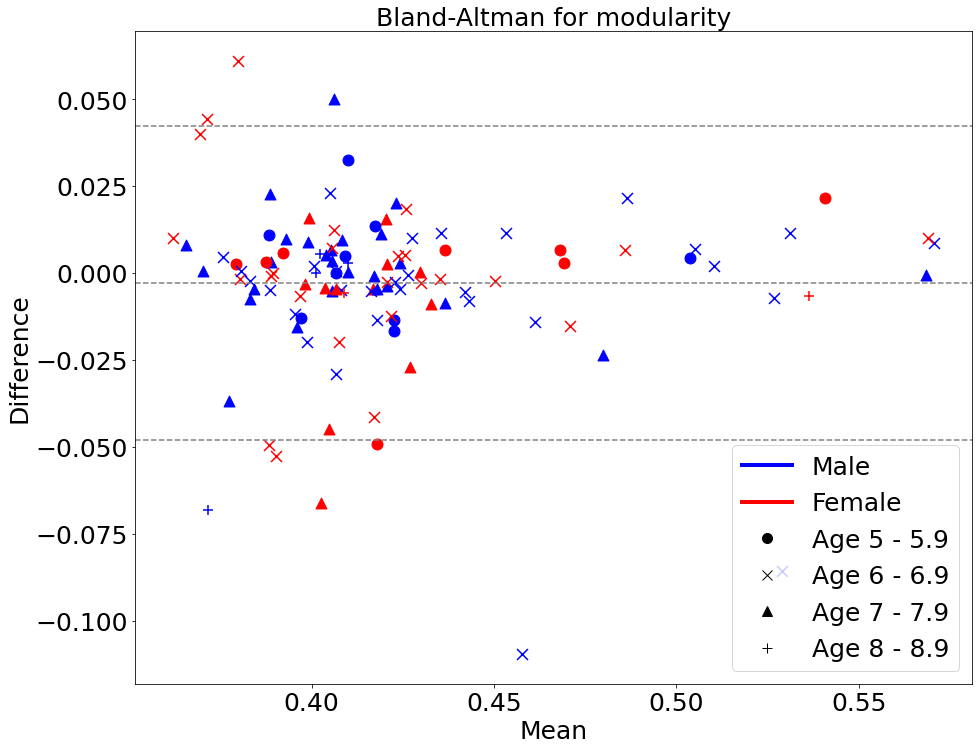

In [8]:
import numpy
from matplotlib.lines import Line2D 
from sklearn import linear_model
plt.figure(figsize=(15,12))
bland_altman_plot(data1mod,data2mod,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for modularity',fontsize=25)
plt.xlabel('Mean',fontsize=25)
plt.ylabel('Difference',fontsize=25)
plt.rcParams.update({'font.size':25})

In [ ]:
ind = []
data1gb = []
data2gb = []
for i in all_gb:
    if ~np.isnan(all_gb[i][0]) and ~np.isnan(all_gb[i][1]):
        data1gb.append(all_gb[i][0])
        data2gb.append(all_gb[i][1])
        ind.append(i)
import pandas as pd
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')
csv_data['sex'].replace(['male','female'],['b','r'],inplace=True)
csv_data['age'] = np.where(csv_data['age'].between(5,5.9),1,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(6,6.9),2,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(7,7.9),3,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(8,8.9),4,csv_data['age'])
csv_data['age'].replace([1,2,3,4],['o','x','^','+'],inplace=True)
csv_data.iloc[ind]

In [ ]:
from matplotlib.lines import Line2D 
plt.figure(figsize=(15,12))
bland_altman_plot(data1gb,data2gb,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for GE')
plt.xlabel('Mean')
plt.ylabel('Difference')

In [ ]:
ind = []
data1cpl = []
data2cpl = []
for i in all_cpl:
    if ~np.isnan(all_cpl[i][0]) and ~np.isnan(all_cpl[i][1]):
        data1cpl.append(all_cpl[i][0])
        data2cpl.append(all_cpl[i][1])
        ind.append(i)
import pandas as pd
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')
csv_data['sex'].replace(['male','female'],['b','r'],inplace=True)
csv_data['age'] = np.where(csv_data['age'].between(5,5.9),1,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(6,6.9),2,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(7,7.9),3,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(8,8.9),4,csv_data['age'])
csv_data['age'].replace([1,2,3,4],['o','x','^','+'],inplace=True)
csv_data.iloc[ind]

In [ ]:
plt.figure(figsize=(15,12))
bland_altman_plot(data1cpl,data2cpl,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for CPL')
plt.xlabel('Mean')
plt.ylabel('Difference')

In [10]:
df_allmod = pd.DataFrame(all_mod)
df_allmod = df_allmod.transpose()
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')

cat_mod = pd.concat([df_allmod,csv_data], axis = 1)
cat_mod = cat_mod.dropna()
cat_mod = cat_mod.rename(columns={0:"scan1"})

df_allge = pd.DataFrame(all_gb)
df_allge = df_allge.transpose()
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')

cat_ge = pd.concat([df_allge,csv_data], axis = 1)
cat_ge = cat_ge.dropna()
cat_ge = cat_ge.rename(columns={0:"scan1"})

df_allcpl = pd.DataFrame(all_cpl)
df_allcpl = df_allcpl.transpose()
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')

cat_cpl = pd.concat([df_allcpl,csv_data], axis = 1)
cat_cpl = cat_cpl.dropna()
cat_cpl = cat_cpl.rename(columns={0:"scan1"})

In [97]:
df_allmod = pd.DataFrame(all_mod)
df_allmod = df_allmod.transpose()
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')

Lcat_mod = pd.concat([df_allmod,csv_data], axis = 1)
Lcat_mod = Lcat_mod.dropna()
Lcat_mod = Lcat_mod.rename(columns={0:"scan1"})

df_allge = pd.DataFrame(all_gb)
df_allge = df_allge.transpose()
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')

Lcat_ge = pd.concat([df_allge,csv_data], axis = 1)
Lcat_ge = Lcat_ge.dropna()
Lcat_ge = Lcat_ge.rename(columns={0:"scan1"})

df_allcpl = pd.DataFrame(all_cpl)
df_allcpl = df_allcpl.transpose()
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')

Lcat_cpl = pd.concat([df_allcpl,csv_data], axis = 1)
Lcat_cpl = Lcat_cpl.dropna()
Lcat_cpl = Lcat_cpl.rename(columns={0:"scan1"})

In [129]:
from matplotlib.legend_handler import HandlerBase


class AnyObjectHandler(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        l1 = plt.Line2D([x0,y0+width], [0.7*height,0.7*height], color='cornflowerblue')
        l2 = plt.Line2D([x0,y0+width], [0.3*height,0.3*height], color='crimson')
        
        return [l1, l2]

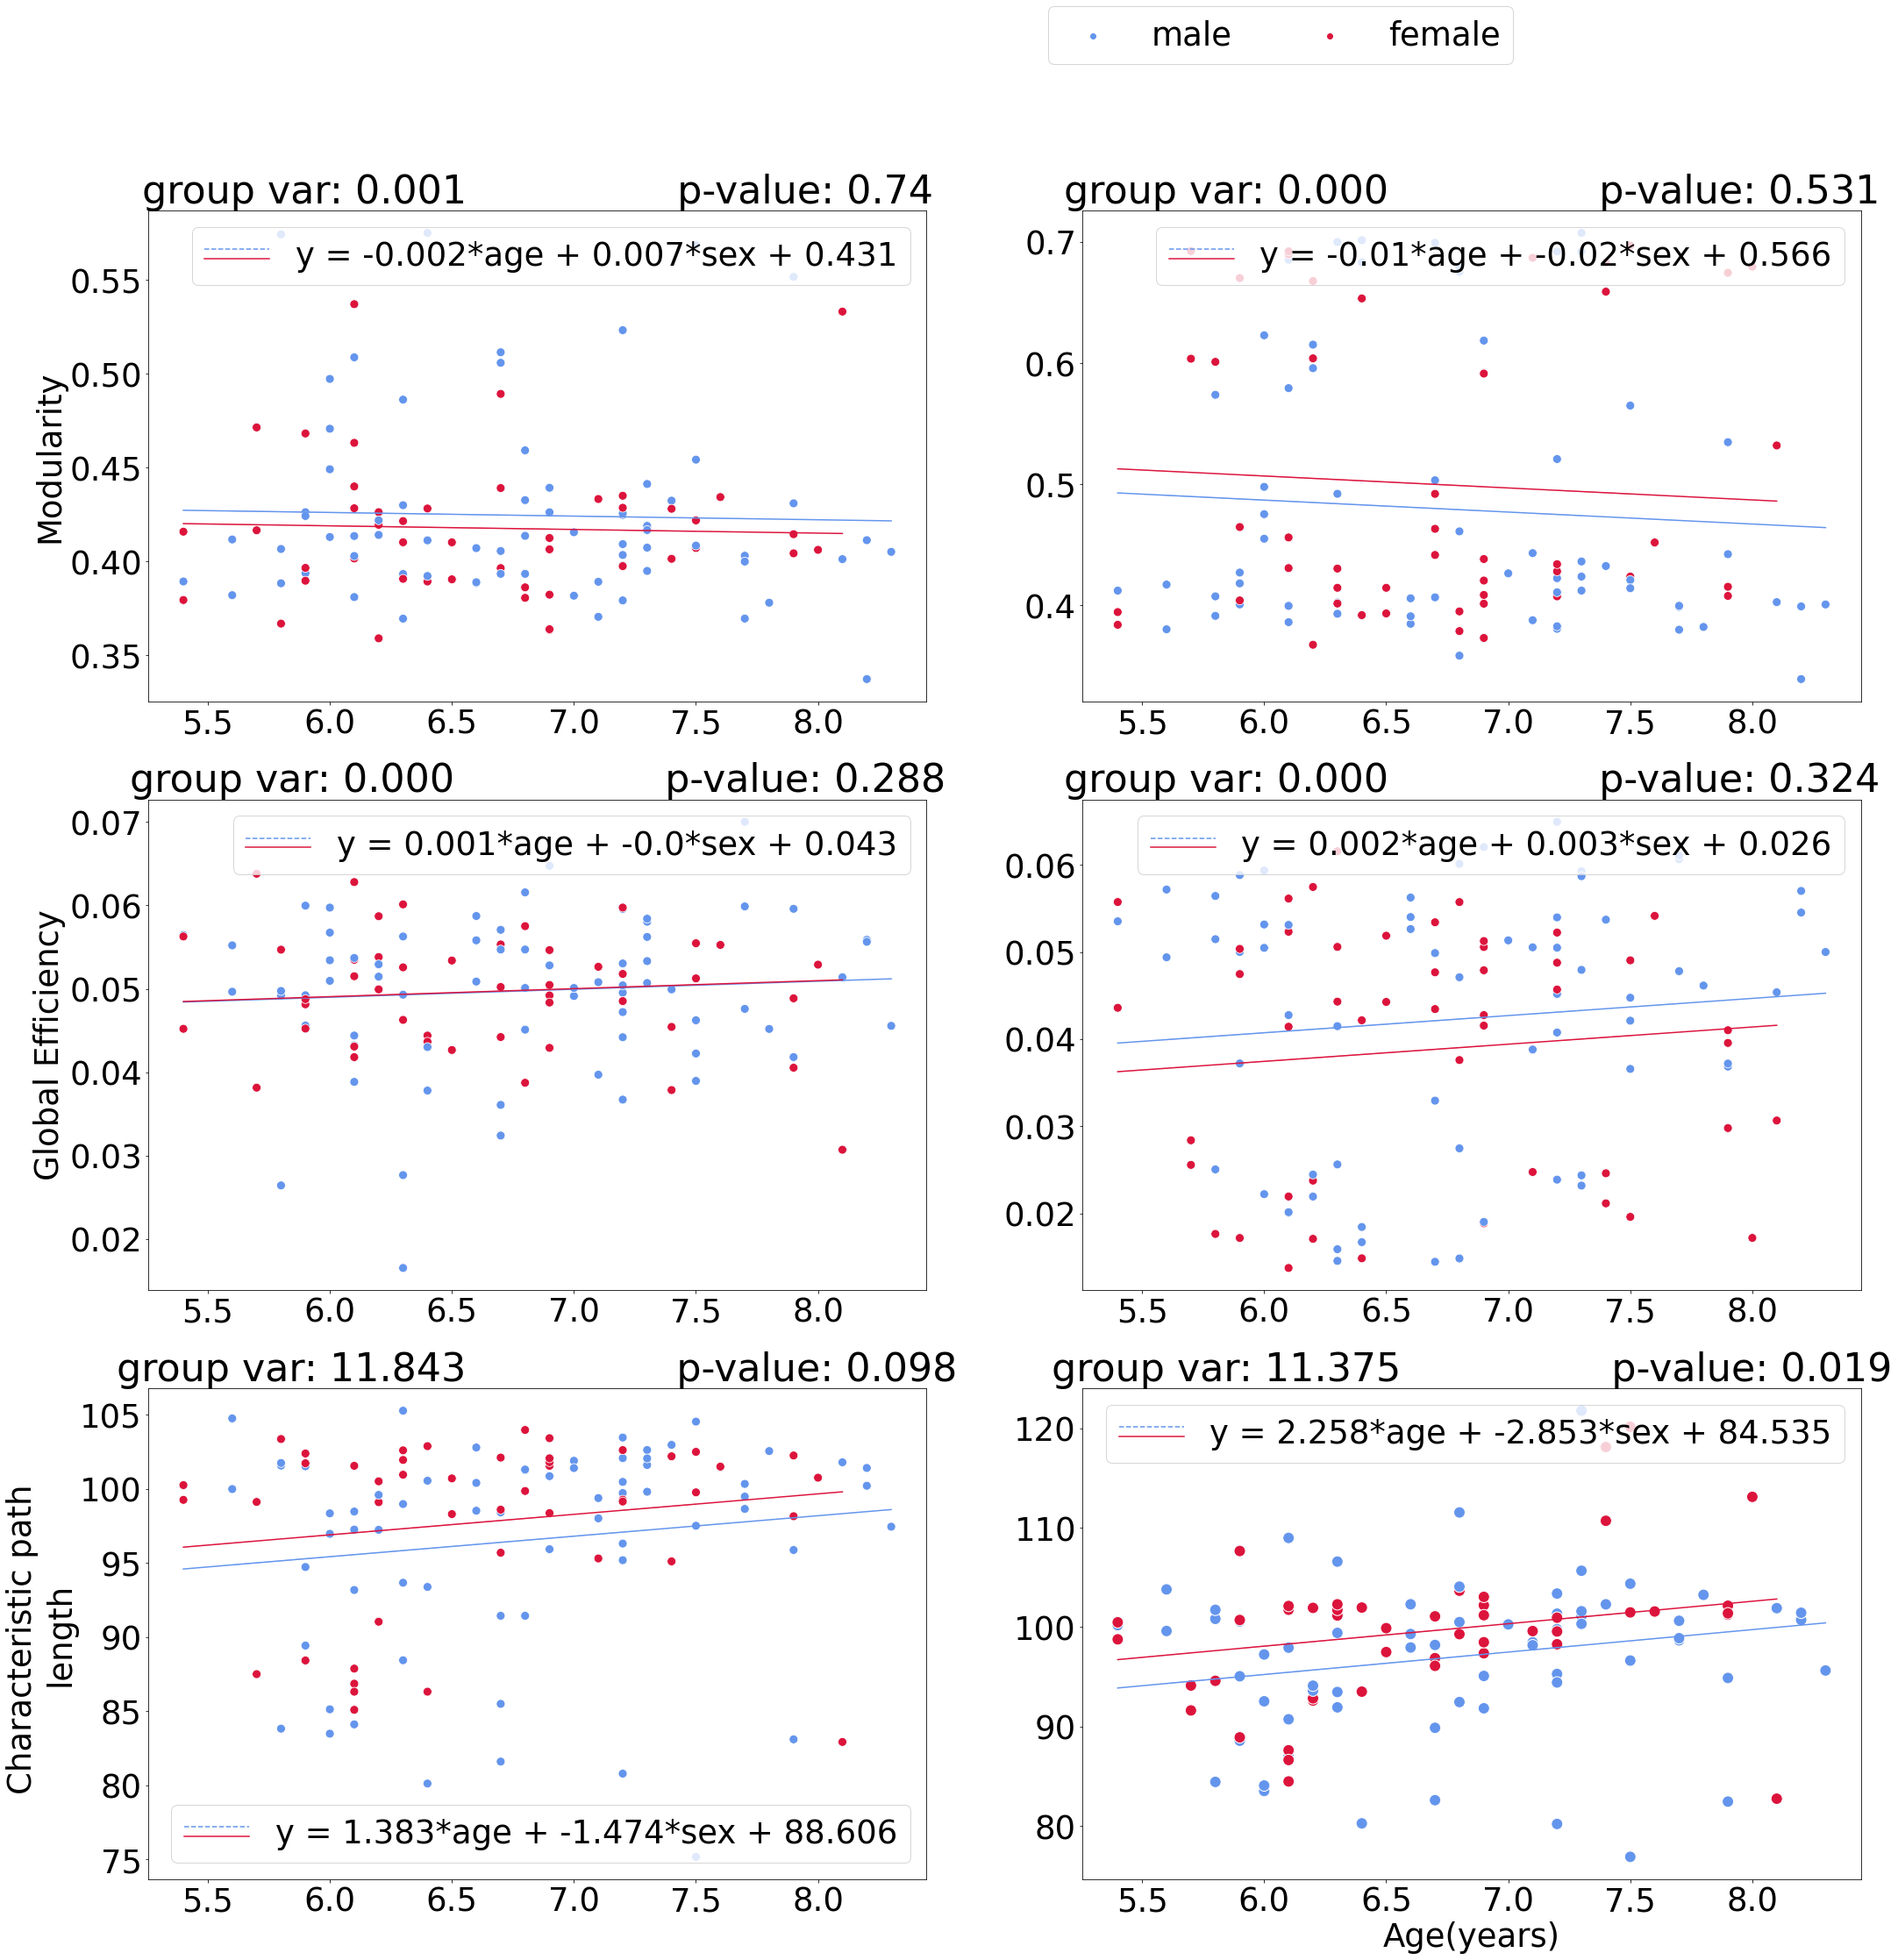

In [128]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
# data = sm.datasets.get_rdataset("dietox", "geepack").data
#md = smf.mixedlm("scan1 ~ age + C(sex)", data=cat_mod, groups="participant_id", vc_formula = {"sex":"0 + C(sex)"})
md = smf.mixedlm("scan1 ~ age + sex", data=cat_mod, groups="participant_id")
mdf = md.fit()
summary = mdf.summary()
table = summary.tables[1]
df_coef = pd.DataFrame(table)
group_var = str(df_coef['Coef.'][3])
pvalue_age = str(round(mdf.pvalues[2],3))
i = str(round(mdf.fe_params[0],3))
co_sex = str(round(mdf.fe_params[1],3))
co_age = str(round(mdf.fe_params[2],3))
line =  "y = " + co_age + '*age + ' + co_sex + '*sex + ' + i 
title = "group var: " + group_var + "                " +" p-value: " + pvalue_age
only_male = cat_mod[cat_mod['sex'] == "male"]
y_male = mdf.predict(only_male[['age','sex']])
only_female = cat_mod[cat_mod['sex'] == "female"]
y_female =  mdf.predict(only_female[['age','sex']])


fig, axes = plt.subplots(3,2, figsize=(35,35))

palette= {'male': 'cornflowerblue','female': 'crimson'}
sns.scatterplot(ax = axes[0,0], x="age", y="scan1",hue='sex', data = cat_mod, s=170, palette=palette)
sns.lineplot(cat_mod["age"],y=y_male, ax = axes[0,0], color='cornflowerblue')
sns.lineplot(cat_mod["age"],y=y_female, ax = axes[0,0], color='crimson')
axes[0,0].set_ylabel('Modularity',fontsize=37)
axes[0,0].set_xlabel(' ')
axes[0,0].legend([object], [line],
           handler_map={object: AnyObjectHandler()}, loc='upper right')
axes[0,0].set_title(title)

md = smf.mixedlm("scan1 ~ age + sex", data=Lcat_mod, groups="participant_id")
mdf = md.fit()
summary = mdf.summary()
table = summary.tables[1]
df_coef = pd.DataFrame(table)
group_var = str(df_coef['Coef.'][3])
pvalue_age = str(round(mdf.pvalues[2],3))
i = str(round(mdf.fe_params[0],3))
co_sex = str(round(mdf.fe_params[1],3))
co_age = str(round(mdf.fe_params[2],3))
line =  "y = " + co_age + '*age + ' + co_sex + '*sex + ' + i 
title = "group var: " + group_var + "                " +" p-value: " + pvalue_age
only_male = Lcat_mod[Lcat_mod['sex'] == "male"]
y_male = mdf.predict(only_male[['age','sex']])
only_female = Lcat_mod[Lcat_mod['sex'] == "female"]
y_female =  mdf.predict(only_female[['age','sex']])

sns.scatterplot(ax = axes[0,1],x="age", y="scan1",hue='sex', data = Lcat_mod, s=100, palette=palette, legend=False)
sns.lineplot(Lcat_mod["age"],y=y_male,ax = axes[0,1],color='cornflowerblue')
sns.lineplot(Lcat_mod["age"],y=y_female,ax = axes[0,1], color='crimson')
axes[0,1].set_ylabel(' ')
axes[0,1].set_xlabel(' ')
axes[0,1].legend([object], [line],
           handler_map={object: AnyObjectHandler()}, loc='upper right')
axes[0,1].set_title(title)

md = smf.mixedlm("scan1 ~ age + sex", data=cat_ge, groups="participant_id")
mdf = md.fit()
summary = mdf.summary()
table = summary.tables[1]
df_coef = pd.DataFrame(table)
group_var = str(df_coef['Coef.'][3])
pvalue_age = str(round(mdf.pvalues[2],3))
i = str(round(mdf.fe_params[0],3))
co_sex = str(round(mdf.fe_params[1],3))
co_age = str(round(mdf.fe_params[2],3))
line =  "y = " + co_age + '*age + ' + co_sex + '*sex + ' + i 
title = "group var: " + group_var + "                " +" p-value: " + pvalue_age
only_male = cat_ge[cat_ge['sex'] == "male"]
y_male = mdf.predict(only_male[['age','sex']])
only_female = cat_ge[cat_ge['sex'] == "female"]
y_female =  mdf.predict(only_female[['age','sex']])

sns.scatterplot(ax = axes[1,0],x="age", y="scan1",hue='sex', data = cat_ge, s=100, palette=palette, legend=False)
sns.lineplot(cat_ge["age"],y=y_male, ax = axes[1,0], color='cornflowerblue')
sns.lineplot(cat_ge["age"],y=y_female, ax = axes[1,0], color='crimson')
axes[1,0].set_ylabel('Global Efficiency',fontsize=37)
axes[1,0].legend([object], [line],
           handler_map={object: AnyObjectHandler()}, loc='upper right')
axes[1,0].set_xlabel(' ')
axes[1,0].set_title(title)

md = smf.mixedlm("scan1 ~ age + sex", data=Lcat_ge, groups="participant_id")
mdf = md.fit()
summary = mdf.summary()
table = summary.tables[1]
df_coef = pd.DataFrame(table)
group_var = str(df_coef['Coef.'][3])
pvalue_age = str(round(mdf.pvalues[2],3))
i = str(round(mdf.fe_params[0],3))
co_sex = str(round(mdf.fe_params[1],3))
co_age = str(round(mdf.fe_params[2],3))
line =  "y = " + co_age + '*age + ' + co_sex + '*sex + ' + i 
title = "group var: " + group_var + "                " +" p-value: " + pvalue_age 
only_male = Lcat_ge[Lcat_ge['sex'] == "male"]
y_male = mdf.predict(only_male[['age','sex']])
only_female = Lcat_ge[Lcat_ge['sex'] == "female"]
y_female =  mdf.predict(only_female[['age','sex']])

sns.scatterplot(ax = axes[1,1],x="age", y="scan1",hue='sex', data = Lcat_ge, s=100, palette=palette, legend=False)
sns.lineplot(Lcat_ge["age"],y=y_male, ax = axes[1,1], color='cornflowerblue')
sns.lineplot(Lcat_ge["age"],y=y_female, ax = axes[1,1], color='crimson')
axes[1,1].set_ylabel(' ')
axes[1,1].set_xlabel(' ')
axes[1,1].legend([object], [line],
           handler_map={object: AnyObjectHandler()}, loc='upper right')
axes[1,1].set_title(title)

md = smf.mixedlm("scan1 ~ age + sex", data=cat_cpl, groups="participant_id")
mdf = md.fit()
summary = mdf.summary()
table = summary.tables[1]
df_coef = pd.DataFrame(table)
group_var = str(df_coef['Coef.'][3])
pvalue_age = str(round(mdf.pvalues[2],3))
i = str(round(mdf.fe_params[0],3))
co_sex = str(round(mdf.fe_params[1],3))
co_age = str(round(mdf.fe_params[2],3))
line =  "y = " + co_age + '*age + ' + co_sex + '*sex + ' + i 
title = "group var: " + group_var + "                " +" p-value: " + pvalue_age
only_male = cat_ge[cat_cpl['sex'] == "male"]
y_male = mdf.predict(only_male[['age','sex']])
only_female = cat_mod[cat_cpl['sex'] == "female"]
y_female =  mdf.predict(only_female[['age','sex']])

sns.scatterplot(ax = axes[2,0],x="age", y="scan1",hue='sex', data = cat_cpl, s=100, palette=palette, legend=False)
sns.lineplot(cat_ge["age"],y=y_male, ax = axes[2,0], color='cornflowerblue')
sns.lineplot(cat_ge["age"],y=y_female, ax = axes[2,0], color='crimson')
axes[2,0].set_ylabel('Characteristic path \nlength',fontsize=37)
axes[2,0].set_xlabel('')
axes[2,0].legend([object], [line],
           handler_map={object: AnyObjectHandler()}, loc='lower right')
axes[2,0].set_title(title)

md = smf.mixedlm("scan1 ~ age + sex", data=Lcat_cpl, groups="participant_id")
mdf = md.fit()
summary = mdf.summary()
table = summary.tables[1]
df_coef = pd.DataFrame(table)
group_var = str(df_coef['Coef.'][3])
pvalue_age = str(round(mdf.pvalues[2],3))
i = str(round(mdf.fe_params[0],3))
co_sex = str(round(mdf.fe_params[1],3))
co_age = str(round(mdf.fe_params[2],3))
line =  "y = " + co_age + '*age + ' + co_sex + '*sex + ' + i 
title = "group var: " + group_var + "                " +" p-value: " + pvalue_age
only_male = Lcat_cpl[Lcat_cpl['sex'] == "male"]
y_male = mdf.predict(only_male[['age','sex']])
only_female = Lcat_cpl[Lcat_cpl['sex'] == "female"]
y_female =  mdf.predict(only_female[['age','sex']])

px = sns.scatterplot(ax = axes[2,1],x="age", y="scan1",hue='sex', data = Lcat_cpl, s=170, palette=palette)
sns.lineplot(Lcat_cpl["age"],y=y_male, ax = axes[2,1], color='cornflowerblue')
sns.lineplot(Lcat_cpl["age"],y=y_female, ax = axes[2,1], color='crimson')
axes[2,1].set_ylabel(' ')
axes[2,1].set_xlabel('Age(years)',fontsize=37)
axes[2,1].legend([object], [line],
           handler_map={object: AnyObjectHandler()}, loc='upper right')
axes[2,1].set_title(title)
plt.rcParams.update({'font.size':37})


handles, labels = px.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2, bbox_to_anchor=(.75, 0.98), fontsize=37)

In [100]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
md = smf.mixedlm("scan1 ~ age + sex", data=cat_mod, groups=cat_mod['participant_id'])
mdf = md.fit()
print(mdf.summary())
print(mdf.fe_params)

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: scan1   
No. Observations: 115     Method:             REML    
No. Groups:       82      Scale:              0.0015  
Min. group size:  1       Log-Likelihood:     181.9592
Max. group size:  2       Converged:          Yes     
Mean group size:  1.4                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.431    0.039 10.913 0.000  0.353  0.508
sex[T.male]  0.007    0.009  0.759 0.448 -0.011  0.025
age         -0.002    0.006 -0.332 0.740 -0.013  0.010
Group Var    0.001    0.011                           

Intercept      0.430649
sex[T.male]    0.007114
age           -0.001942
dtype: float64


In [94]:
a = mdf.summary()
print(a)
table = a.tables[1]
df_coef = pd.DataFrame(table)#, header=0, index_col=0)[0]
print('Group Var', df_coef['Coef.'][3])
print('Pvalue age', round(mdf.pvalues[2],3))
i = str(round(mdf.fe_params[0],3))
co_sex = str(round(mdf.fe_params[1],3))
co_age = str(round(mdf.fe_params[2],3))
line =  "y = " + co_age + '*age + ' + co_sex + '*sex + ' + i 
print('Intercept',round(mdf.fe_params[0],3))
print('sex',round(mdf.fe_params[1],3))
print('age',round(mdf.fe_params[2],3))
print('line', line)

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: scan1   
No. Observations: 115     Method:             REML    
No. Groups:       82      Scale:              0.0015  
Min. group size:  1       Log-Likelihood:     181.9592
Max. group size:  2       Converged:          Yes     
Mean group size:  1.4                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.431    0.039 10.913 0.000  0.353  0.508
sex[T.male]  0.007    0.009  0.759 0.448 -0.011  0.025
age         -0.002    0.006 -0.332 0.740 -0.013  0.010
Group Var    0.001    0.011                           

Group Var 0.001
Pvalue age 0.74
Intercept 0.431
sex 0.007
age -0.002
line y = -0.002*age + 0.007*sex + 0.431


In [ ]:
md = smf.mixedlm("scan1 ~ age + sex", data=cat_ge, groups="participant_id")
mdf = md.fit()
print(mdf.summary())
print(mdf.fe_params)
only_male = cat_ge[cat_ge['sex'] == "male"]
y_male = mdf.predict(only_male[['age','sex']])
only_female = cat_mod[cat_ge['sex'] == "female"]
y_female =  mdf.predict(only_female[['age','sex']])
sns.scatterplot(x="age", y="scan1",hue='sex', data = cat_ge, s=100)
sns.lineplot(cat_ge["age"],y=y_male)
sns.lineplot(cat_ge["age"],y=y_female,color='orange')
plt.gcf().set_size_inches(12,6)
plt.ylabel('GE')
plt.xlabel('Age(years)')
plt.title('Without L(r)')

In [ ]:
md = smf.mixedlm("scan1 ~ age + sex", data=cat_ge, groups="participant_id")
mdf = md.fit()
print(mdf.summary())
print(mdf.fe_params)
only_male = cat_ge[cat_ge['sex'] == "male"]
y_male = mdf.predict(only_male[['age','sex']])
only_female = cat_mod[cat_ge['sex'] == "female"]
y_female =  mdf.predict(only_female[['age','sex']])
sns.scatterplot(x="age", y="scan1",hue='sex', data = cat_ge, s=100)
sns.lineplot(cat_ge["age"],y=y_male)
sns.lineplot(cat_ge["age"],y=y_female,color='orange')
plt.gcf().set_size_inches(12,6)
plt.ylabel('GE')
plt.xlabel('Age(years)')
plt.title('With L(r)')

In [ ]:
md = smf.mixedlm("scan1 ~ age + sex", data=cat_cpl, groups="participant_id")
mdf = md.fit()
print(mdf.summary())
print(mdf.fe_params)
only_male = cat_ge[cat_cpl['sex'] == "male"]
y_male = mdf.predict(only_male[['age','sex']])
only_female = cat_mod[cat_cpl['sex'] == "female"]
y_female =  mdf.predict(only_female[['age','sex']])
sns.scatterplot(x="age", y="scan1",hue='sex', data = cat_cpl, s=100)
sns.lineplot(cat_ge["age"],y=y_male)
sns.lineplot(cat_ge["age"],y=y_female,color='orange')
plt.gcf().set_size_inches(12,6)
plt.ylabel('CPL')
plt.xlabel('Age(years)')
plt.title('Without L(r)')

In [ ]:
md = smf.mixedlm("scan1 ~ age + sex", data=cat_cpl, groups="participant_id")
mdf = md.fit()
print(mdf.summary())
print(mdf.fe_params)
only_male = cat_ge[cat_cpl['sex'] == "male"]
y_male = mdf.predict(only_male[['age','sex']])
only_female = cat_mod[cat_cpl['sex'] == "female"]
y_female =  mdf.predict(only_female[['age','sex']])
sns.scatterplot(x="age", y="scan1",hue='sex', data = cat_cpl, s=100)
sns.lineplot(cat_ge["age"],y=y_male)
sns.lineplot(cat_ge["age"],y=y_female,color='orange')
plt.gcf().set_size_inches(12,6)
plt.ylabel('CPL')
plt.xlabel('Age(years)')
plt.title('With L(r)')

In [ ]:
def cov_cal(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.nanmean([data1, data2], axis=0)
    std       = np.nanstd([data1, data2], axis=0)                  # Difference between data1 and data2
    cov        = (std / mean)                  # Mean of the difference
    return cov

In [ ]:
cov_mod = cov_cal(data1mod,data2mod)
cov_ge = cov_cal(data1gb,data2gb)
cov_cpl = cov_cal(data1cpl,data2cpl)

In [ ]:
import pandas as pd
df1 = pd.DataFrame(cov_mod).assign(x='Without L(r)').dropna()
df2 = pd.DataFrame(Lcov_mod).assign(x='With L(r)').dropna()

df3 = pd.DataFrame(cov_ge).assign(x='Without L(r)').dropna()
df4 = pd.DataFrame(Lcov_ge).assign(x='With L(r)').dropna()

df5 = pd.DataFrame(cov_cpl).assign(x='Without L(r)').dropna()
df6 = pd.DataFrame(Lcov_cpl).assign(x='With L(r)').dropna()

dfmod = pd.concat([df1,df2])
dfge = pd.concat([df3,df4])
dfcpl = pd.concat([df5,df6])

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(1,3, figsize=(33,12))

flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
palette= {'Without L(r)': 'cornflowerblue','With L(r)': 'crimson'}
sns.boxplot(ax = axes[0], x="x",y=0,data=dfmod,flierprops=flierprops, width=0.4 , palette=palette)
axes[0].set_title('Modularity', fontsize=37)


sns.boxplot(ax = axes[1],x="x",y=0,data=dfge,flierprops=flierprops, width=0.4 ,palette=palette)
axes[1].set_title('Global efficiency', fontsize=37)


sns.boxplot(ax = axes[2],x="x",y=0,data=dfcpl,flierprops=flierprops, width=0.4 ,palette=palette)
axes[2].set_title('Characteristics path length', fontsize=37)
plt.rcParams.update({'font.size':37})
plt.savefig('fig1.png')